# Notebook to create amplitude versus gamma plot

In [ ]:
# Install the chainconsumer package if it is not already installed
!pip install 'chainconsumer==0.33.0'

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
from chainconsumer import ChainConsumer

%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### Plotting specifications

In [2]:
# 15yr plotting specs
plt.rcParams.update(plt.rcParamsDefault)
with open('../ng15_rcparams.json', 'r') as fin:
    plt.rcParams.update(json.load(fin))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

### Read in long HD chains for fixed and varied gamma. 

These are concatenated from runs by William Lamb and Nihan Pol.

In [3]:
datapath = './figure1_data/'

#### Varied gamma

In [4]:
hd_chain = np.load(datapath + 'nano15_hd_chain_long_050523.npy')

In [5]:
## amp
print(10**np.percentile(hd_chain[:,1],q=5),#-10**np.percentile(hd_chain[:,1],q=50), 
      10**np.percentile(hd_chain[:,1],q=95),#-10**np.percentile(hd_chain[:,1],q=50), 
      10**np.percentile(hd_chain[:,1],q=50))
## gamma
print(np.percentile(hd_chain[:,0],q=5),#-np.percentile(hd_chain[:,0],q=50), 
      np.percentile(hd_chain[:,0],q=95),#-np.percentile(hd_chain[:,0],q=50), 
      np.percentile(hd_chain[:,0],q=50))

3.699923194590101e-15 1.0558530221516469e-14 6.385420941789065e-15
2.659568427502257 3.839771874796981 3.2476865997217192


#### Fixed gamma=13/3

In [6]:
hd_chain_fg = np.load(datapath + 'nano15_hd_chain_fg_long_050523.npy')

In [7]:
print(10**np.percentile(hd_chain_fg,q=5), 
      10**np.percentile(hd_chain_fg,q=95), 
      10**np.percentile(hd_chain_fg,q=50))

1.815211583802292e-15 3.0689227094055674e-15 2.403918137658136e-15


In [8]:
print(10**np.percentile(hd_chain_fg,q=5)-10**np.percentile(hd_chain_fg,q=50), 
      10**np.percentile(hd_chain_fg,q=95)-10**np.percentile(hd_chain_fg,q=50))

-5.887065538558439e-16 6.650045717474314e-16


In [9]:
tmp_chain_fg = hd_chain_fg.copy()
# updating amplitude to be referenced to lower frequency
correction_factor = 0.5 * (3-(13./3.)) * np.log10(0.1)
tmp_chain_fg = correction_factor + tmp_chain_fg

In [10]:
print(10**np.percentile(tmp_chain_fg,q=5), 
      10**np.percentile(tmp_chain_fg,q=95), 
      10**np.percentile(tmp_chain_fg,q=50))

8.425465818021274e-15 1.4244677379197537e-14 1.1157999584673217e-14


# Final Plot -- Note that I (Steve) made final tweaks in mac preview to get the manuscript plot

/var/folders/bt/hxhr8xxx7d11f4lwfyj1_b580000gn/T/ipykernel_99507/2236122122.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.axes[2].set_yticklabels(fig.axes[2].get_yticklabels(),rotation=45)


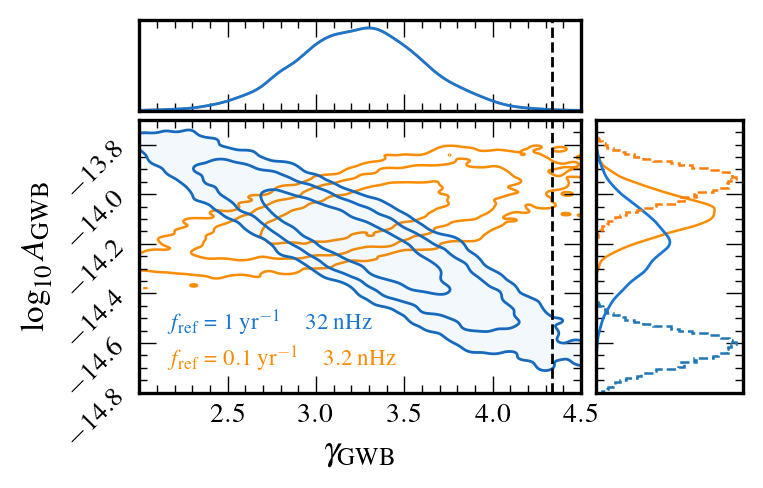

In [11]:
from matplotlib.ticker import FormatStrFormatter

labs = [r'$\gamma_\mathrm{GWB}$', 
        r'$\log_{10}A_\mathrm{GWB}$']

c = ChainConsumer()
c.add_chain(hd_chain,
          weights=None,
          parameters=labs, 
          zorder=2, name='$f_\mathrm{ref}$ = $1\,\, \mathrm{yr}^{-1}\quad 32\,\,\mathrm{nHz}$')


# reference frequency = 1 / 10yr 
tmp_chain = hd_chain.copy()
# updating amplitude to be referenced to lower frequency
correction_factor = 0.5 * (3-tmp_chain[:,0]) * np.log10(0.1)
tmp_chain[:,1] = correction_factor + tmp_chain[:,1]


c.add_chain(tmp_chain,
          weights=None,
          parameters=labs, 
          zorder=1, name='$f_\mathrm{ref}$ = $0.1\,\, \mathrm{yr}^{-1}\quad 3.2\,\,\mathrm{nHz}$')

c.configure(usetex=True, 
            bar_shade=[False, False],
            colors=['blue', 'orange'],
           linestyles=['solid', 'solid'],
           linewidths=[1.0,0.9],
           shade=[True,False], 
            shade_alpha=[0.05, 0.0],
            summary=False,
            smooth=50.0,
            diagonal_tick_labels=False,
           legend_kwargs={'loc':(0.03,0.05), 'handlelength':0, 
                          'markerfirst':True, 'fontsize':'small'},
           sigmas=[0,1,2,3], 
            shade_gradient=0.0)

fig = c.plotter.plot(truth=[4.333,-12],
                     extents=[(2, 4.5), (-14.8, -13.7)],
                    figsize=(3.5503666805036667, 2.1942472810764047)) 
fig.axes[2].minorticks_on()
fig.axes[2].tick_params(which='both',direction='in',tick2On=True)
fig.axes[2].set_yticklabels(fig.axes[2].get_yticklabels(),rotation=45)
fig.axes[2].set_yticks([-14.8,-14.6,-14.4,-14.2,-14.0,-13.8])
fig.axes[2].yaxis.set_major_formatter(FormatStrFormatter('$%.1f$'))

fig.axes[0].set_xlim(fig.axes[2].get_xlim())
fig.axes[0].set_xticks(fig.axes[2].get_xticks()[:-1])
fig.axes[0].minorticks_on()
fig.axes[0].tick_params(which='both',direction='in',top=True,
                        labeltop=False,bottom=True,labelbottom=False)

fig.axes[3].set_yticks(fig.axes[2].get_yticks()[:-1])
fig.axes[3].set_xlim(0,6.)
fig.axes[3].minorticks_on()
fig.axes[3].tick_params(which='both',direction='in',right=True,
                        labelright=False,left=True,labelleft=False)
fig.axes[3].hist(hd_chain_fg,density=True,color='C0',histtype='step',
                 ls='dashed',lw=0.9,orientation='horizontal',bins=60)
fig.axes[3].hist(tmp_chain_fg,density=True,color='C1',histtype='step',
                 ls='dashed',lw=0.9,orientation='horizontal',bins=60)

plt.show()
#plt.savefig('nano15_14f_cornerplot_2amps_vg_fg_050523.pdf',bbox_inches='tight',dpi=400)